## Ⅰ. Figure and Axes

가장 기본적인 서브플롯 배치 방법

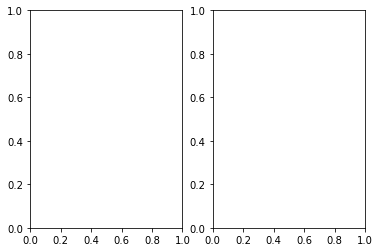

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(121)
ax = fig.add_subplot(122)
plt.show()

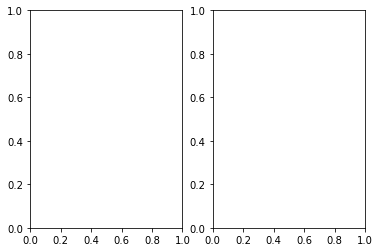

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.show()

* `facecolor` : figure의 색

* `dpi` : dots per inch

* `sharex`, `sharey` : 축 공유
    
* `squeeze` : False면 axes를 항상 2차원 배열로 반환

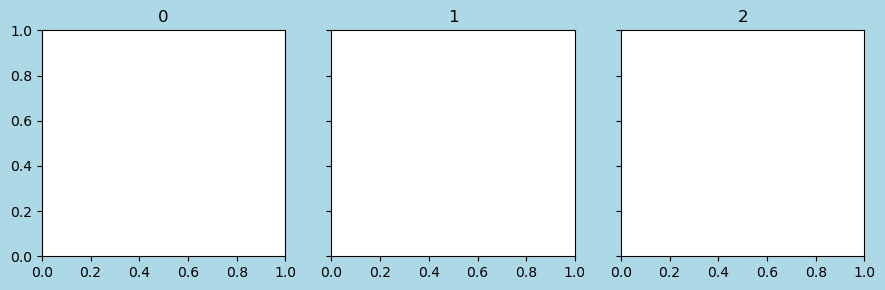

In [3]:
n, m = 1, 3

fig, axes = plt.subplots(n, m, figsize=(m*3, n*3), squeeze=False,
                         facecolor='lightblue', dpi=100, sharey=True)
        
idx = 0
for i in range(n):
    for j in range(m):
        axes[i][j].set_title(idx)
        idx+=1

plt.tight_layout()
plt.show()

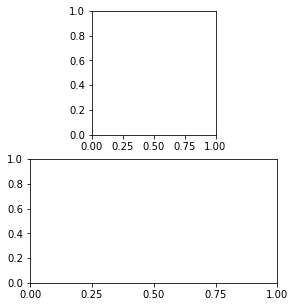

In [4]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(211, aspect=1)
ax2 = fig.add_subplot(212, aspect=0.5, sharex=ax1)
plt.show()

## Ⅱ. Gridspec

슬라이싱을 이용한 서브플롯을 배치 방법

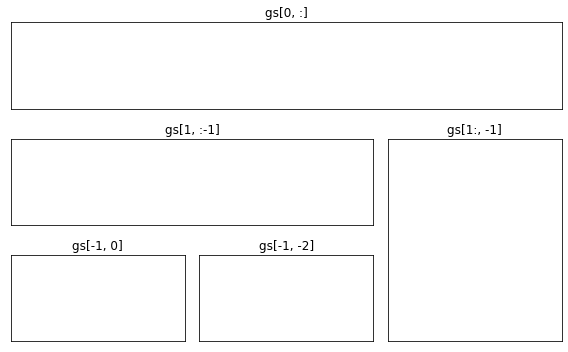

In [5]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3)
ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

## Ⅲ. subplot2grid

colspan과 rowspan을 이용한 배치 방법

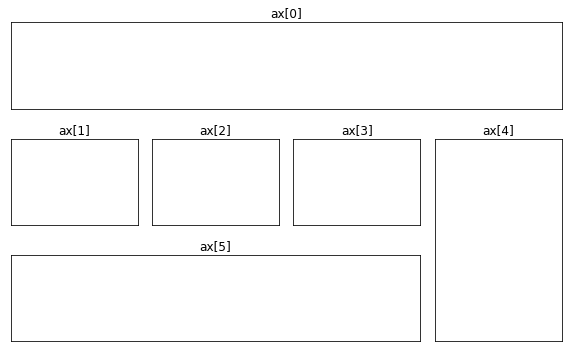

In [6]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1, rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])
    
fig.tight_layout()
plt.show()

## Ⅳ. add_axes

figure 비율을 이용한 서브플롯 배치 방법

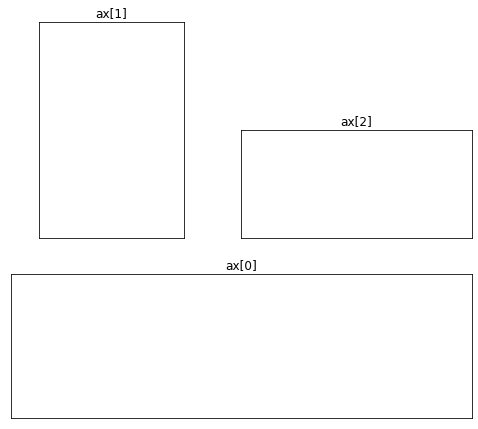

In [7]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]

ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

## Ⅴ. inset_axes

ax 안에 ax 배치

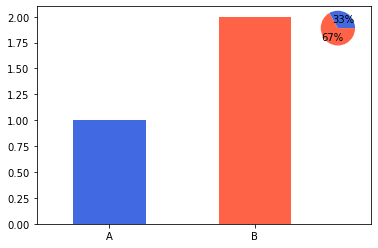

In [8]:
fig, ax = plt.subplots()

color=['royalblue', 'tomato']
ax.bar(['A', 'B'], [1, 2], color=color, width=0.5)
ax.set_xlim(-0.5, 1.8)

axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2])
axin.pie([1, 2], colors=color, autopct='%1.0f%%')
plt.show()

## Ⅵ. make_axes_locatable

ax를 쪼깨는 방법 (colorbar 만들때 사용 가능)

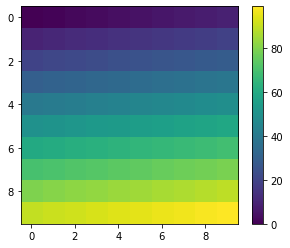

In [9]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)

im = ax.imshow(np.arange(100).reshape((10, 10)))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

fig.colorbar(im, cax=cax)
plt.show()